In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./allegro-api-transactions.csv")

# 1.1 Target encoding

Replacing each category with a blend of the mean target value for that category and 
the mean target value over all the training data.

Advantages:
* compared to one-hot encoding: significant reduction of dimensionality of the data, helps avoiding the curse of dimensionality
* flexibility: by adjusting min_sample_leaf we can choose how many categories we want in ecoded data

Disadvantages:
* possible data leakage and consequently overfitting (may be reduced by regularization - increasing smoothing parameter)
* additional hyperparameter to tune

Before target encoding we have over ten thousand unique locations

In [4]:
df.it_location.nunique()

10056

Many values with low count are not very informative or are different spellings of the same place

In [5]:
cities_count = df.groupby("it_location").size()

cities_count.sort_values(ascending=True)[:40]

it_location
Ostrów Wlkp./maxchrom.pl             1
JAZZLANDIA                           1
JELENIA GORA                         1
donki                                1
JEŻEWO                               1
Nowy Korczyn                         1
JONIEC                               1
Teofile                              1
dominowo                             1
domaszowice                          1
Nowy Jasiniec                        1
JAZ                                  1
dolice                               1
Nowy Dwór Wejherowski                1
dobryszyce                           1
Jabłonna Marjątek 12                 1
Jabłonna Mjątek 12                   1
Nowy Dwór Maz. 5                     1
Jabłonna k/Lublina                   1
dobrodzień                           1
Tokyo                                1
Nowy Dwór                            1
Jabłoń                               1
Jabłonna                             1
Jacków                               1
Tenczynek/Kra

Many locations appear only once

In [6]:
cities_count.where(cities_count == 1).sum()

3133.0

In [7]:
X = df.it_location

y = df.price

encoder = ce.TargetEncoder(cols='it_location')

encoder.fit(X, y)

TargetEncoder(cols=['it_location'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              min_samples_leaf=1, return_df=True, smoothing=1.0, verbose=0)

After target encoding number of unique values decreased significantly

In [8]:
X_cleaned = encoder.transform(X)

X_cleaned.it_location.nunique()

6283

In [9]:
unique_values = [ce.TargetEncoder(cols='it_location', min_samples_leaf=i).fit_transform(X, y).nunique() for i in range(1, 1000, 10)]

unique_values = [unique_values[i].values[0] for i in range(len(unique_values))]

In [10]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

By manipulating number of minimum samples to take category average into account while encoding, 
we can adjust granularity of our data

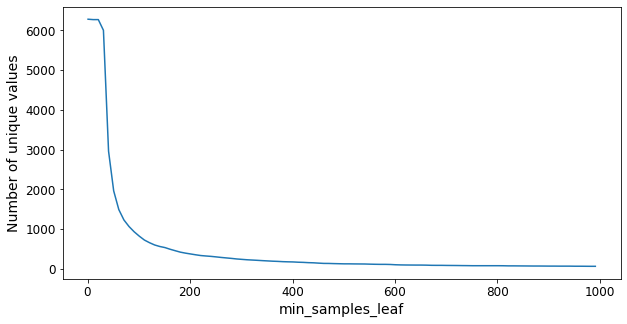

In [11]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = range(1, 1000, 10), y = unique_values)
ax.set(xlabel='min_samples_leaf', ylabel='Number of unique values' )
plt.show()

# 1.2 One Hot Encoding

Creating  one binary  feature per category.

Advantages:
* easily interpretable results with models that output coefficients estimates for each feature
* memory eficient if used with sparse matrix 

Disadvantages:
* encoding high cardinality features results in too many aditional featues that can hurt model performance due to high dimensionality

In [12]:
df.main_category.unique()

array(['Komputery', 'Odzież, Obuwie, Dodatki', 'Dom i Ogród',
       'Książki i Komiksy', 'Biżuteria i Zegarki', 'RTV i AGD',
       'Motoryzacja', 'Dla Dzieci', 'Uroda', 'Telefony i Akcesoria',
       'Sport i Turystyka', 'Delikatesy', 'Kolekcje', 'Gry', 'Rękodzieło',
       'Zdrowie', 'Przemysł', 'Filmy', 'Fotografia', 'Biuro i Reklama',
       'Instrumenty', 'Muzyka', 'Konsole i automaty',
       'Sprzęt estradowy, studyjny i DJ-ski', 'Antyki i Sztuka', 'Bilety',
       'Nieruchomości'], dtype=object)

In [13]:
df.main_category.nunique()

27

In [14]:
X = df.main_category

encoder = ce.OneHotEncoder(cols='main_category', use_cat_names=True)
encoder.fit(X)

X_cleaned = encoder.transform(X)

In [15]:
X_cleaned.head()

,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,main_category_Telefony i Akcesoria,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1.3 Binary encoding

Similar to one hot encoding, but stores categories as binary bitstrings.

Advantages:
* results in fewer additional features

Disadvantages:
* not interpretable coefficients

In [16]:
encoder = ce.BinaryEncoder(cols='main_category')
encoder.fit(X, y)

X_cleaned = encoder.transform(X)

In [17]:
X_cleaned.head()

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0


# 1.4 Leave One Out Encoding

Similar to target encoding but excludes the current row’s target when calculating the mean target for a level to reduce the effect of outliers.

Advantages:
* robust to outliers
* option to add noise into training data in order to decrease overfitting (sigma parameter)

Disadvantages:
* possibility of data leakage
* additional hyperparameter to tune

In [18]:
encoder = ce.LeaveOneOutEncoder(cols='main_category')
encoder.fit(X, y)

X_cleaned = encoder.transform(X)

In [19]:
X_cleaned.head()

,main_category
0,121.810064
1,75.858049
2,72.434754
3,25.027497
4,75.858049


# 2 Data imputation

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [21]:
imputer = IterativeImputer()

In [22]:
numerical_data = df[['price', 'it_seller_rating', 'it_quantity']]

In [23]:
def compute_imputation_RMSE(data, columns_to_impute, imputer, perc_missing, num_iterations):
      
    RMSEs = []
    
    remove_number = int(data.shape[0] * perc_missing)
    
    for i in range(num_iterations):

        data_impute = data.copy()

        # Removing data
        for column in columns_to_impute:
            
            drop_indices = np.random.choice(data.index, remove_number, replace=False)

            data_impute.loc[drop_indices, column] = None
        
        # Imputation
        data_impute = pd.DataFrame(imputer.fit_transform(data_impute), columns=data.columns)
        
        RMSEs.append(mean_squared_error(data, data_impute, squared=False))
        
    return RMSEs

## 2.1 Imputation vs number of features with missing data

In [24]:
RMSEs_one_columm = compute_imputation_RMSE(data=numerical_data, 
                                columns_to_impute=['it_seller_rating'],
                                imputer=imputer, 
                                perc_missing=0.1, 
                                num_iterations=10)

In [25]:
RMSEs_two_columns = compute_imputation_RMSE(data=numerical_data, 
                                columns_to_impute=['it_seller_rating', 'it_quantity'],
                                imputer=imputer, 
                                perc_missing=0.1, 
                                num_iterations=10)

In [26]:
RMSEs_three_columns = compute_imputation_RMSE(data=numerical_data, 
                                columns_to_impute=['it_seller_rating', 'it_quantity', 'price'],
                                imputer=imputer, 
                                perc_missing=0.1, 
                                num_iterations=10)

RMSE is significanlty smaller when data is removed only from one feature, suggesting that there is loss of information when more data is removed.
Interestingly enough, removing values from two and three featues have similar effect on RMSE (but with higher SD when removing 3 features)

In [27]:
print(f' Mean RMSE: {round(np.mean(RMSEs_one_columm), 1)}, SD: {round(np.std(RMSEs_one_columm))}')

 Mean RMSE: 6693.5, SD: 63.0


In [28]:
print(f' Mean RMSE: {round(np.mean(RMSEs_two_columns), 1)}, SD: {round(np.std(RMSEs_two_columns))}')

 Mean RMSE: 7923.4, SD: 46.0


In [29]:
print(f' Mean RMSE: {round(np.mean(RMSEs_three_columns), 1)}, SD: {round(np.std(RMSEs_three_columns))}')

 Mean RMSE: 7963.7, SD: 77.0


In [30]:
RMSEs = pd.DataFrame({'one_column_removed' : RMSEs_one_columm,
                      'two_columns_removed' : RMSEs_two_columns,
                      'three_columns_removed' : RMSEs_three_columns,
                      'iterations' : range(1, 11)})

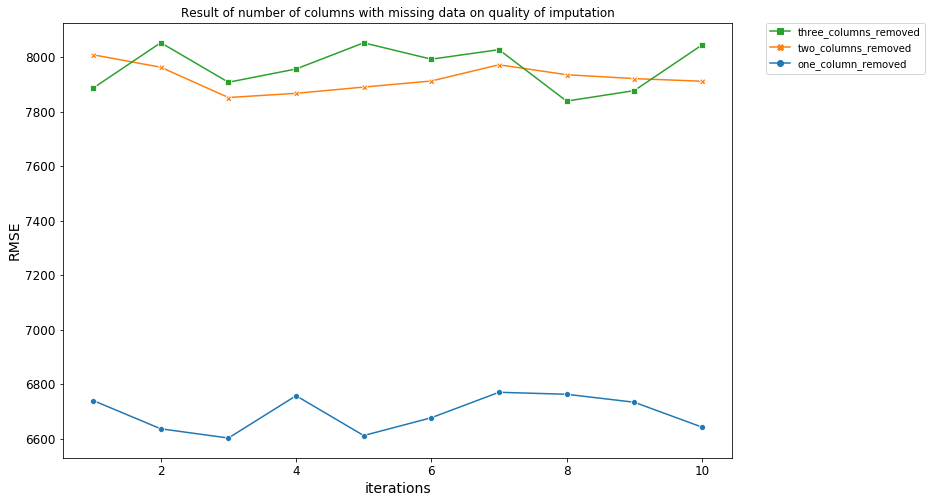

In [31]:
plt.figure(figsize=(12, 8))

ax = sns.lineplot(x='iterations', y='value', hue='variable', style='variable',
                  markers=True, dashes=False, data=pd.melt(RMSEs, id_vars='iterations'))

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles[1:]), reversed(labels[1:]), title= '', 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel='RMSE', title="Result of number of columns with missing data on quality of imputation")
plt.show()

## 2.2 Imputation vs % of data missing

In [32]:
data_missing = [compute_imputation_RMSE(data=numerical_data, 
                                columns_to_impute=['it_seller_rating'],
                                imputer=IterativeImputer(), 
                                perc_missing=0.05 * i, 
                                num_iterations=10) for i in range(1, 11)]

In [33]:
data_missing = pd.DataFrame(np.asanyarray(data_missing).T, columns=[f'{0.05 * i:.2f}%' for i in range(1, 11)])

In [34]:
data_missing['iterations'] = range(1, 11)

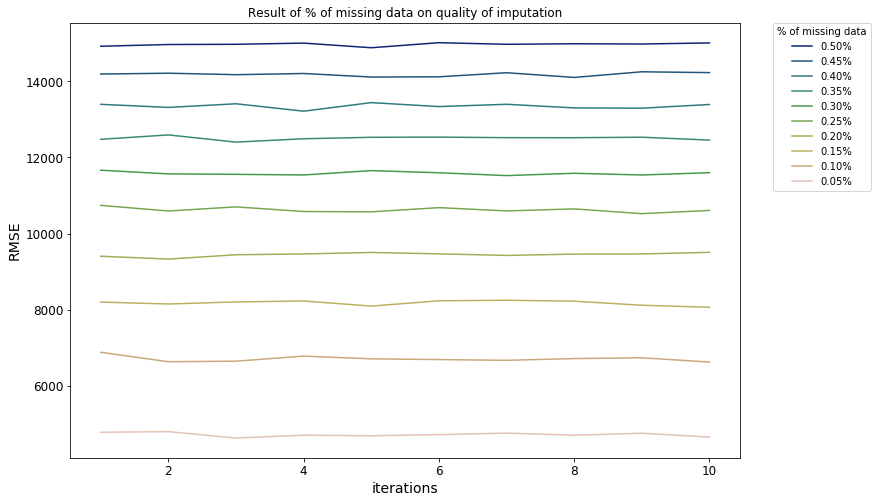

In [35]:
plt.figure(figsize=(12, 8))

ax = sns.lineplot(x='iterations', y='value', hue='variable',
                  markers=True, dashes=False, palette='gist_earth_r', data=pd.melt(data_missing, id_vars='iterations'))

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles[1:]), reversed(labels[1:]), title='% of missing data', 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel='RMSE', title="Result of % of missing data on quality of imputation")
plt.show()

As one may guess, removing more data results in worse imputation